<a href="https://colab.research.google.com/github/seshu541/FakeReviewDetection/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

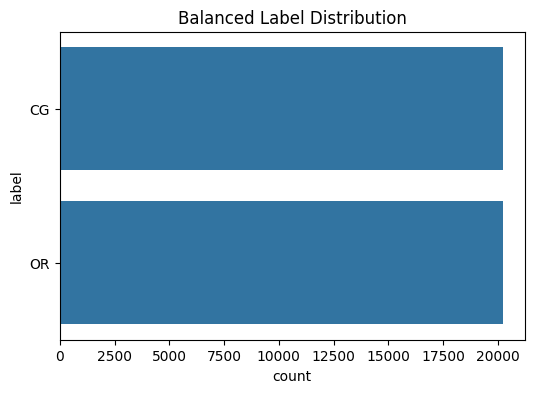

Accuracy: 0.9075058736243353
Classification Report:
              precision    recall  f1-score   support

          CG       0.92      0.89      0.91      4016
          OR       0.89      0.93      0.91      4071

    accuracy                           0.91      8087
   macro avg       0.91      0.91      0.91      8087
weighted avg       0.91      0.91      0.91      8087



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

# Load dataset
file_path ='/content/fakereviewsdataset.csv'
data = pd.read_csv(file_path)

# Handle class imbalance by oversampling the minority class
df_majority = data[data['label'] == 'CG']
df_minority = data[data['label'] == 'OR']

# Upsample minority class (OR) to match majority class (CG)
df_minority_upsampled = resample(df_minority,
                                 replace=True,   # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([df_majority, df_minority_upsampled])

# EDA: Label distribution after balancing
plt.figure(figsize=(6, 4))
sns.countplot(data_upsampled['label'])
plt.title('Balanced Label Distribution')
plt.show()

# Preprocess text data: Clean and tokenize the reviews
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=5, ngram_range=(1, 2))
X = vectorizer.fit_transform(data_upsampled['text_'])

# Target variable
y = data_upsampled['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model with balanced data
nb_model = MultinomialNB(alpha=0.1)  # Adding alpha for smoothing
nb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output accuracy and classification report
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')